In [1]:
# from http://flothesof.github.io/k-means-numpy.html
import numpy as np

def init_points(n):
    points = np.array(np.vstack(((np.random.randn(4*n, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(3*n, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(2*n, 2) * 0.5 + np.array([-0.5, -0.5])))))
    return points

def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)


def move_centroids(mode, points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    filtered_centroids = []
    removed_centroids = np.array([])
    removed_points = np.array([])
    new_centroids = np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    max_change = 0.0
    for k in range(centroids.shape[0]):
        T = (new_centroids[k] - centroids[k])**2
        max = np.max(np.abs(T))
        if max > max_change:
                max_change = max
        if mode == 'purge':
            if max > epsilon:
                filtered_centroids.append(new_centroids[k])
            else:
                if len(removed_centroids) == 0:
                    removed_centroids = new_centroids[k]
                else:
                    removed_centroids = np.vstack([removed_centroids, new_centroids[k]])
                if len(removed_points) == 0:
                    removed_points = points[closest==k]
                else:
                    removed_points = np.vstack([removed_points, points[closest==k]])
                points = points[closest!=k]
                closest = closest[closest!=k]
    
    if mode == 'purge':     
        return np.array(filtered_centroids), max_change, removed_centroids, removed_points, points
    else:
        return new_centroids, max_change



 # normal:
Worked on 2000 nodes over 22 iterations in 0.5618929862976074 seconds.


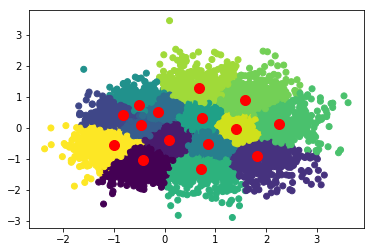



 # purge:
Worked on 2000 nodes over 9 iterations in 0.10178899765014648 seconds.


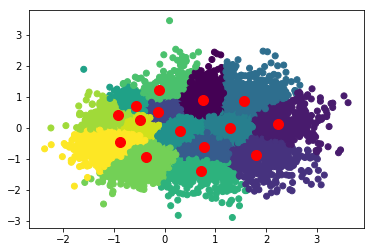

In [22]:
import time
%matplotlib inline

import matplotlib.pyplot as plt

times = {'normal': {},
         'purge' : {}}

n_points = 2000
n_centroids = 15
exp = 1
epsilon = 0.0002

while exp < 2:
    exp += 1
    n_centroids = n_centroids
    n_points = n_points
    epsilon = epsilon
    
    original_points = init_points(n_points)    
    original_centroids = initialize_centroids(original_points, n_centroids)
    
    for mode in ['normal', 'purge']:
        
        iteration_count = 0
    
        points = original_points
        centroids = original_centroids
        max_change = epsilon
        
        start_time = time.time()
        removed_centroids = []
        removed_points = []
        while max_change >= epsilon:
            
            iteration_count += 1
            
            closest = closest_centroid(points, centroids)
            
            if mode == 'normal':
                move_centroids(mode, points, closest, centroids)
                centroids, max_change = move_centroids(mode, points, closest, centroids)
            else:
                centroids, max_change, new_removed_centroids, new_removed_points, points = move_centroids(mode, points, closest, centroids)
                if len(new_removed_centroids) != 0:
                    if len(removed_centroids) == 0:
                        removed_centroids = new_removed_centroids
                    else:
                        removed_centroids = np.vstack([removed_centroids, new_removed_centroids])
                if len(new_removed_points) != 0:
                    if len(removed_points) == 0:
                        removed_points = new_removed_points
                    else:
                        removed_points = np.vstack([removed_points, new_removed_points])
        stopped_time = time.time() - start_time
        
        print('\n\n # ' + mode + ':')
        print('Worked on ' + str(n_points) + ' nodes over ' + str(iteration_count) + ' iterations in ' + str(stopped_time) + ' seconds.')
        times[mode][n_points] = stopped_time
        
        if mode == 'purge':
            centroids = removed_centroids
       
        closest = closest_centroid(original_points, centroids)
        
        # create a simple figure
        fig = plt.figure()
        ax = plt.axes()
        ax.cla()
        ax.scatter(original_points[:, 0], original_points[:, 1], c=closest)
        ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
        plt.show()

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

chart_height = 40
chart_width = 90000
bar_width = chart_width / 50

plt.bar(list(times['purge'].keys()), times['purge'].values(), align='center', width = bar_width)

plt.xlabel('epsilon')
plt.ylabel('time (s)')
plt.title('times[purge]')
plt.grid(True)
ax = plt.axes()
ax.set_xlim([0,chart_width])
ax.set_ylim([0,chart_height])
plt.show()

plt.figure(figsize=(20,5))

plt.bar(list(times['normal'].keys()), times['normal'].values(), align='center', width = bar_width)

plt.xlabel('epsilon')
plt.ylabel('time (s)')
plt.title('times[normal]')
plt.grid(True)
ax = plt.axes()
ax.set_xlim([0,chart_width])
ax.set_ylim([0,chart_height])
plt.show()

In [ ]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, n_centroids)

line, = ax.plot([], [], lw=2)
init_points(n_points)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c = closest)
    centroids = move_centroids_purge(closest, centroids)
    
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    
    ax.set_xlim([-2.5,4])
    ax.set_ylim([-2.5,2.5])

    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=40, interval=1, blit=True)